In [1]:
import pandas as pd
import numpy as np
import ast
import re
from collections import defaultdict

### load business data and review data

In [2]:
trainSize=10000
business_train = pd.read_json('..//data//business_train.json',orient = 'records',lines = True)
review_train=pd.read_json('..//data//review_train.json',orient='records',lines=True,chunksize=trainSize)



### preserve business_id, stars columns and save it to local json files

In [39]:
# count=2
# res=next(review_train).iloc[:,[0,2]]
# for reviewTrainChunk in review_train:
#     print("processing {} th chunk ...".format(count))
#     res=res.append(reviewTrainChunk.iloc[:,[0,2]])
#     count+=1
# print("finished")

processing 2 th chunk ...
processing 3 th chunk ...
processing 4 th chunk ...
processing 5 th chunk ...
processing 6 th chunk ...
processing 7 th chunk ...
processing 8 th chunk ...
processing 9 th chunk ...
processing 10 th chunk ...
processing 11 th chunk ...
processing 12 th chunk ...
processing 13 th chunk ...
processing 14 th chunk ...
processing 15 th chunk ...
processing 16 th chunk ...
processing 17 th chunk ...
processing 18 th chunk ...
processing 19 th chunk ...
processing 20 th chunk ...
processing 21 th chunk ...
processing 22 th chunk ...
processing 23 th chunk ...
processing 24 th chunk ...
processing 25 th chunk ...
processing 26 th chunk ...
processing 27 th chunk ...
processing 28 th chunk ...
processing 29 th chunk ...
processing 30 th chunk ...
processing 31 th chunk ...
processing 32 th chunk ...
processing 33 th chunk ...
processing 34 th chunk ...
processing 35 th chunk ...
processing 36 th chunk ...
processing 37 th chunk ...
processing 38 th chunk ...
processin

processing 299 th chunk ...
processing 300 th chunk ...
processing 301 th chunk ...
processing 302 th chunk ...
processing 303 th chunk ...
processing 304 th chunk ...
processing 305 th chunk ...
processing 306 th chunk ...
processing 307 th chunk ...
processing 308 th chunk ...
processing 309 th chunk ...
processing 310 th chunk ...
processing 311 th chunk ...
processing 312 th chunk ...
processing 313 th chunk ...
processing 314 th chunk ...
processing 315 th chunk ...
processing 316 th chunk ...
processing 317 th chunk ...
processing 318 th chunk ...
processing 319 th chunk ...
processing 320 th chunk ...
processing 321 th chunk ...
processing 322 th chunk ...
processing 323 th chunk ...
processing 324 th chunk ...
processing 325 th chunk ...
processing 326 th chunk ...
processing 327 th chunk ...
processing 328 th chunk ...
processing 329 th chunk ...
processing 330 th chunk ...
processing 331 th chunk ...
processing 332 th chunk ...
processing 333 th chunk ...
processing 334 th ch

In [41]:
# res.shape
# res.columns

# res=res.groupby('business_id',as_index=False).mean()

# res.to_json("average_star_by_shops.json",orient='records')

Index(['business_id', 'stars'], dtype='object')

In [3]:
shop_stars=pd.read_json("average_star_by_shops.json",orient="records")

### Extract nested json data from business data

In [4]:
def nestedValue(x:str):
    """judge if a string contains nested json information"""
    return re.match(u'{.*}',x)

### first extract the column names from nested json
colnames=[]
for attribute in business_train.attributes:
    if attribute==None:
        continue
    for key,value in attribute.items():
        if not nestedValue(value):
            colnames.append(key)
        else:
            for nestKey,nestValue in ast.literal_eval(value).items():
                colnames.append(nestKey)
colnames=set(colnames)

### second extract the value from nested json file
res=defaultdict(list)
count=0
for attribute in business_train.attributes:
    
    
    for i in colnames:
        res[i].append(None)
    if attribute==None:
        count+=1
        continue
    for key,value in attribute.items():
        if not nestedValue(value):
            res[key][count]=value
        else:
            for nestKey,nestValue in ast.literal_eval(value).items():
                res[nestKey][count]=nestValue
            
        
    count+=1 

attributeTrain=pd.DataFrame(res)

attributeTrain['business_id']=business_train.business_id

### join business data and review rating on business_id

In [5]:
attributeTrain=attributeTrain.join(shop_stars.set_index('business_id'),on="business_id",how='left')

### data cleaning, drop columns with many NAs, convert string to category 

In [6]:
attributeTrainReduced=attributeTrain.dropna(thresh=len(attributeTrain)*0.2, axis=1)

attributeTrainReduced=attributeTrainReduced.drop("business_id",axis=1);

attributeTrainReduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154606 entries, 0 to 154605
Data columns (total 31 columns):
divey                         31984 non-null object
RestaurantsAttire             38964 non-null object
classy                        38039 non-null object
RestaurantsGoodForGroups      43803 non-null object
garage                        81327 non-null object
ByAppointmentOnly             37709 non-null object
touristy                      38039 non-null object
RestaurantsDelivery           42027 non-null object
intimate                      38039 non-null object
BusinessAcceptsCreditCards    90752 non-null object
RestaurantsTakeOut            49768 non-null object
romantic                      38039 non-null object
RestaurantsReservations       41820 non-null object
Alcohol                       38726 non-null object
RestaurantsPriceRange2        86713 non-null object
WiFi                          40026 non-null object
hipster                       37538 non-null object
upsca

In [236]:
for colName in attributeTrainReduced.columns[:-1]:
    attributeTrainReduced[colName]=attributeTrainReduced[colName].astype('category')

In [243]:
attributeTrainReduced.iloc[:,0].values

[NaN, False, NaN, NaN, NaN, ..., False, NaN, NaN, NaN, NaN]
Length: 154606
Categories (2, object): [False, True]

### try fit a simple linear regression

In [245]:
pd.get_dummies(attributeTrainReduced).iloc[:5,:]

,stars,hipster_False,hipster_True,BikeParking_False,BikeParking_None,BikeParking_True,upscale_False,upscale_True,RestaurantsReservations_False,RestaurantsReservations_None,...,garage_True,WiFi_'free',WiFi_'no',WiFi_'paid',WiFi_None,WiFi_u'free',WiFi_u'no',WiFi_u'paid',touristy_False,touristy_True
0,3.000000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4.073034,1,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,5.000000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.000000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3.666667,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression



X_train, X_test, y_train, y_test = train_test_split(pd.get_dummies(attributeTrainReduced).iloc[:,1:],pd.get_dummies(attributeTrainReduced).iloc[:,0],  random_state=0)

In [250]:
modelSlr = LinearRegression().fit(X_train, y_train)
pred=modelSlr.predict(X_test)
print("the score(rmse) is {}".format(np.sqrt(mean_squared_error(pred,y_test))))

the score(rmse) is 0.9707625101864331


### round the rating value and use a multioutcome logistic regression

In [324]:
# here, we need to make continuous ylabel to be categorical variable
y_train_class=np.round(y_train)
y_test_class=np.round(y_test)
from sklearn.linear_model import LogisticRegression

modelLr=LogisticRegression(multi_class='multinomial',solver='newton-cg')
modelLr.fit(X_train,y_train_class)
pred=modelLr.predict(X_test)
print("the score is {}".format(mean_squared_error(pred,y_test_class)))

the score is 1.539661595777709


### Linear Discriminant Analysis  (different from zihan's latent dirichlet allocation topic model)
Here, we would like to select a few dimensions, each dimension is a linear combination of the business attribute, that separate the most of five classes.

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
modelLda = LinearDiscriminantAnalysis(n_components=2)

modelLda.fit(X_train,y_train_class)
temp=modelLda.transform(X_test)
print(temp)

modelLda.fit(X_train,y_train_class)
pred=modelLda.predict(X_test)
print("the score(rmse) is {}".format(np.sqrt(mean_squared_error(pred,y_test_class))))

### use randomforest to have a glimpse at feature importance

In [326]:
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline            

modelRfc = RandomForestClassifier()
modelRfc.fit(X_train, y_train_class)

pred=modelRfc.predict(X_test)
print("the score(rmse) is {}".format(np.sqrt(mean_squared_error(pred,y_test_class))))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


the score(rmse) is 1.2519156386201389


the prediction is better than logistic regression

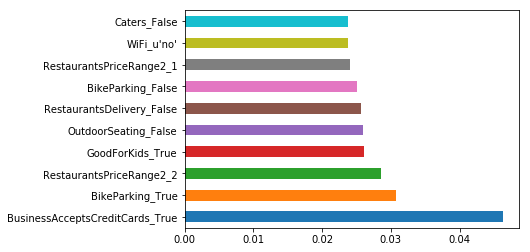

In [327]:
pd.Series(modelRfc.feature_importances_, index=X_train.columns).nlargest(10).plot(kind='barh')

some variables actually make sense, so we extract a single tree from the forest to visualize it.

In [316]:
from sklearn.tree import export_graphviz
# Extract single tree
estimator = modelRfc.estimators_[5]

# Export to dot file
export_graphviz(estimator, 
                out_file='tree.dot', 
                feature_names = X_train.columns,
                
                rounded = True, proportion = False, 
                precision = 2, filled = True)
# Convert to png
import os
os.system('dot -Tpng tree.dot -o tree.png')

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

### check the meaning of each variable and do variable selection

In [311]:
for i in attributeTrainReduced.columns[:-1]:
    print("--------------------------------------------------------------------")
    category=pd.unique(attributeTrainReduced[i])
    if (True in category and False in category) or ("True" in category and "False" in category):
        for subClass in category:
            subClassRate=round(np.sum(attributeTrainReduced[i]==subClass)/attributeTrainReduced.shape[0]*100,2)
            subClassStar=round(np.mean(attributeTrainReduced.stars[attributeTrainReduced[i]==subClass]),2)
            print("For {},{}% shops are {}, the average ratings are {}".format(i,subClassRate,subClass,subClassStar))
        if np.mean(attributeTrainReduced.stars[attributeTrainReduced[i].isin([True,"True"])])>np.mean(attributeTrainReduced.stars[attributeTrainReduced[i].isin(["False",False])]):
            print("Shops have True value for {} tend to have higher ratings".format(i))
        else:
            print("Shops have False value for {} tend to have higher ratings".format(i))
    else:
        for subClass in category:
            subClassRate=round(np.sum(attributeTrainReduced[i]==subClass)/attributeTrainReduced.shape[0]*100,2)
            subClassStar=round(np.mean(attributeTrainReduced.stars[attributeTrainReduced[i]==subClass]),2)
            print("For {},{}% shops are {}, the average ratings are {}".format(i,subClassRate,subClass,subClassStar))



--------------------------------------------------------------------
For hipster,0.0% shops are nan, the average ratings are nan
For hipster,23.71% shops are False, the average ratings are 3.48
For hipster,0.57% shops are True, the average ratings are 3.94
Shops have True value for hipster tend to have higher ratings
--------------------------------------------------------------------
For BikeParking,0.0% shops are nan, the average ratings are nan
For BikeParking,34.48% shops are True, the average ratings are 3.7
For BikeParking,9.75% shops are False, the average ratings are 3.49
For BikeParking,0.1% shops are None, the average ratings are 3.62
Shops have True value for BikeParking tend to have higher ratings
--------------------------------------------------------------------
For upscale,0.0% shops are nan, the average ratings are nan
For upscale,24.22% shops are False, the average ratings are 3.48
For upscale,0.29% shops are True, the average ratings are 3.81
Shops have True value fo

For RestaurantsAttire,14.67% shops are u'casual', the average ratings are 3.41
For RestaurantsAttire,0.23% shops are 'dressy', the average ratings are 3.75
For RestaurantsAttire,0.49% shops are u'dressy', the average ratings are 3.67
For RestaurantsAttire,0.04% shops are u'formal', the average ratings are 3.12
For RestaurantsAttire,0.02% shops are None, the average ratings are 3.22
For RestaurantsAttire,0.03% shops are 'formal', the average ratings are 3.55
--------------------------------------------------------------------
For validated,0.0% shops are nan, the average ratings are nan
For validated,52.27% shops are False, the average ratings are 3.62
For validated,0.32% shops are True, the average ratings are 3.84
Shops have True value for validated tend to have higher ratings
--------------------------------------------------------------------
For RestaurantsDelivery,0.0% shops are nan, the average ratings are nan
For RestaurantsDelivery,19.96% shops are False, the average ratings ar

Conclusion:

RestaurantsTakeOut: False is better

touristy: False is better

BusinessAcceptsCreditCards : False is better (why)

RestaurantsAttire: formal is better

NoiseLevel: quiet is better

### PCA

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
modelPca = PCA(n_components=2)
modelPca.fit(X_train)

### Randomforest for review key words extraction based on tfidf vector